#JS_Vulnerabilites






 Loading The Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score

data = pd.read_csv('Java.csv')
print(data)

                                name  \
0                     initFileServer   
1                       api.sendFile   
2      <anonymous>.followFileToServe   
3               <anonymous>.sendFile   
4       <anonymous>.sendFileNotFound   
...                              ...   
12120                    <anonymous>   
12121                    <anonymous>   
12122                    <anonymous>   
12123                    <anonymous>   
12124                    <anonymous>   

                                                longname  \
0             initializers.initFileServer.initFileServer   
1      initializers.initFileServer.initFileServer.sen...   
2      initializers.initFileServer.initFileServer.fol...   
3      initializers.initFileServer.initFileServer.sen...   
4      initializers.initFileServer.initFileServer.sen...   
...                                                  ...   
12120             lib.directory.handler.handler.serial$1   
12121             lib.directory.handler

2.Finiding if any null values are present in the given data set.

In [ ]:
print("Missing values in each column:\n", data.isnull().sum())


Missing values in each column:
 name              0
longname          0
path              0
full_repo_path    0
line              0
column            0
endline           0
endcolumn         0
CC                0
CCL               0
CCO               0
CI                0
CLC               0
CLLC              0
McCC              0
NL                0
NLE               0
CD                0
CLOC              0
DLOC              0
TCD               0
TCLOC             0
LLOC              0
LOC               0
NOS               0
NUMPAR            0
TLLOC             0
TLOC              0
TNOS              0
HOR_D             0
HOR_T             0
HON_D             0
HON_T             0
HLEN              0
HVOC              0
HDIFF             0
HVOL              0
HEFF              0
HBUGS             0
HTIME             0
CYCL              0
PARAMS            0
CYCL_DENS         0
Vuln              0
dtype: int64


3.Since there are no null values pesent in the given data set we more further for ourlers detection.

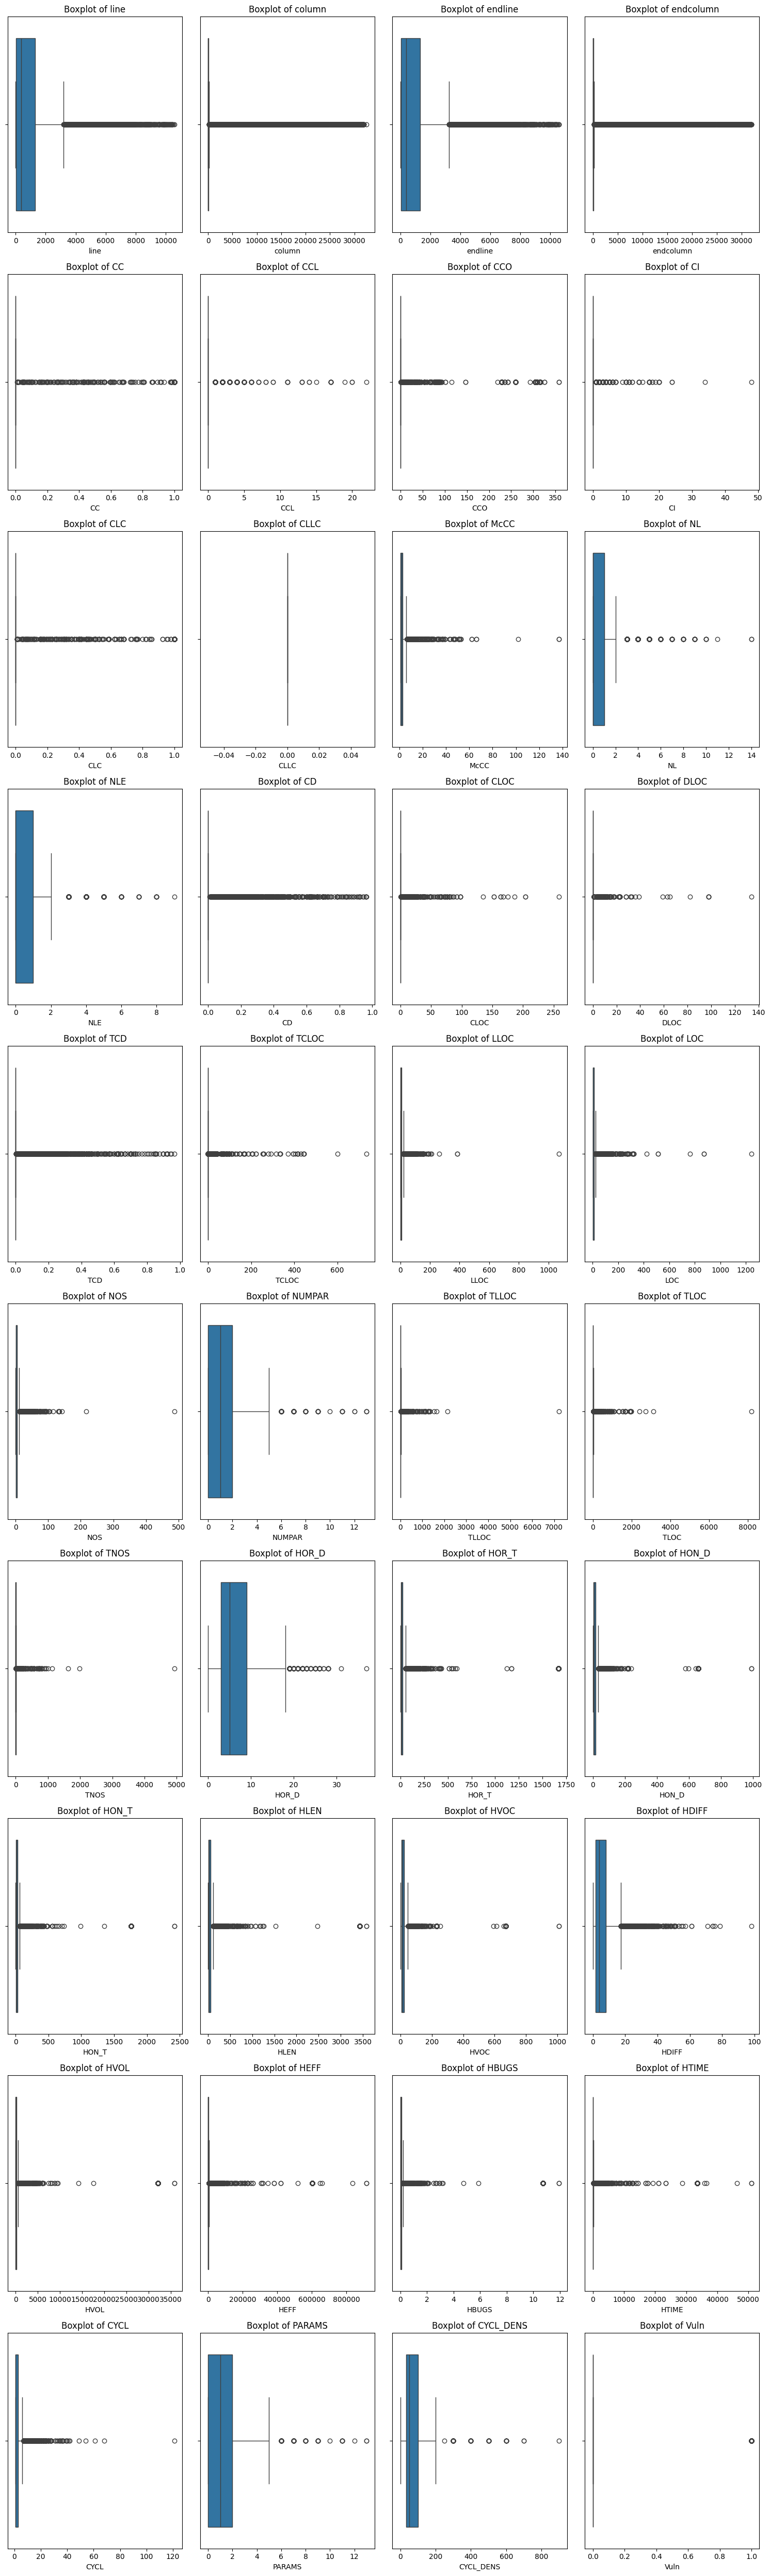

In [ ]:
num_cols = len(data.select_dtypes(include=['float64', 'int64']).columns)

num_rows = int(np.ceil(num_cols / 4))
num_cols_grid = min(num_cols, 4)

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(num_rows, num_cols_grid, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

4.Removing the outliers that are present in the given data set using IQR

In [ ]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

data_cleaned = remove_outliers_iqr(data)
print("Original data shape:", data.shape)
print("Data shape after outlier removal:", data_cleaned.shape)


Original data shape: (12125, 44)
Data shape after outlier removal: (1879, 44)


In [ ]:
def remove_outliers_iqr_adjusted(df, multiplier=3):
 mmmmmmmm   numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
data_cleaned = remove_outliers_iqr_adjusted(data, multiplier=3)
print("Data shape after adjusted IQR outlier removal:", data_cleaned.shape)


Data shape after adjusted IQR outlier removal: (3750, 44)


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in data.select_dtypes(include=['object']).columns:
    if data[column].nunique() < data.shape[0] * 0.5 or column == target_variable:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
    else:
        print(f"Column '{column}' has many unique string values. Consider dropping or alternative encoding.")
        data = data.drop(columns=[column])

correlation = data.corr()[target_variable].abs()
low_correlation_cols = correlation[correlation < 0.1].index.tolist()


Column 'longname' has many unique string values. Consider dropping or alternative encoding.


In [ ]:
data = data.drop(columns=low_correlation_cols)

X = data.drop(columns=[target_variable])
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5.Ploting the corelation

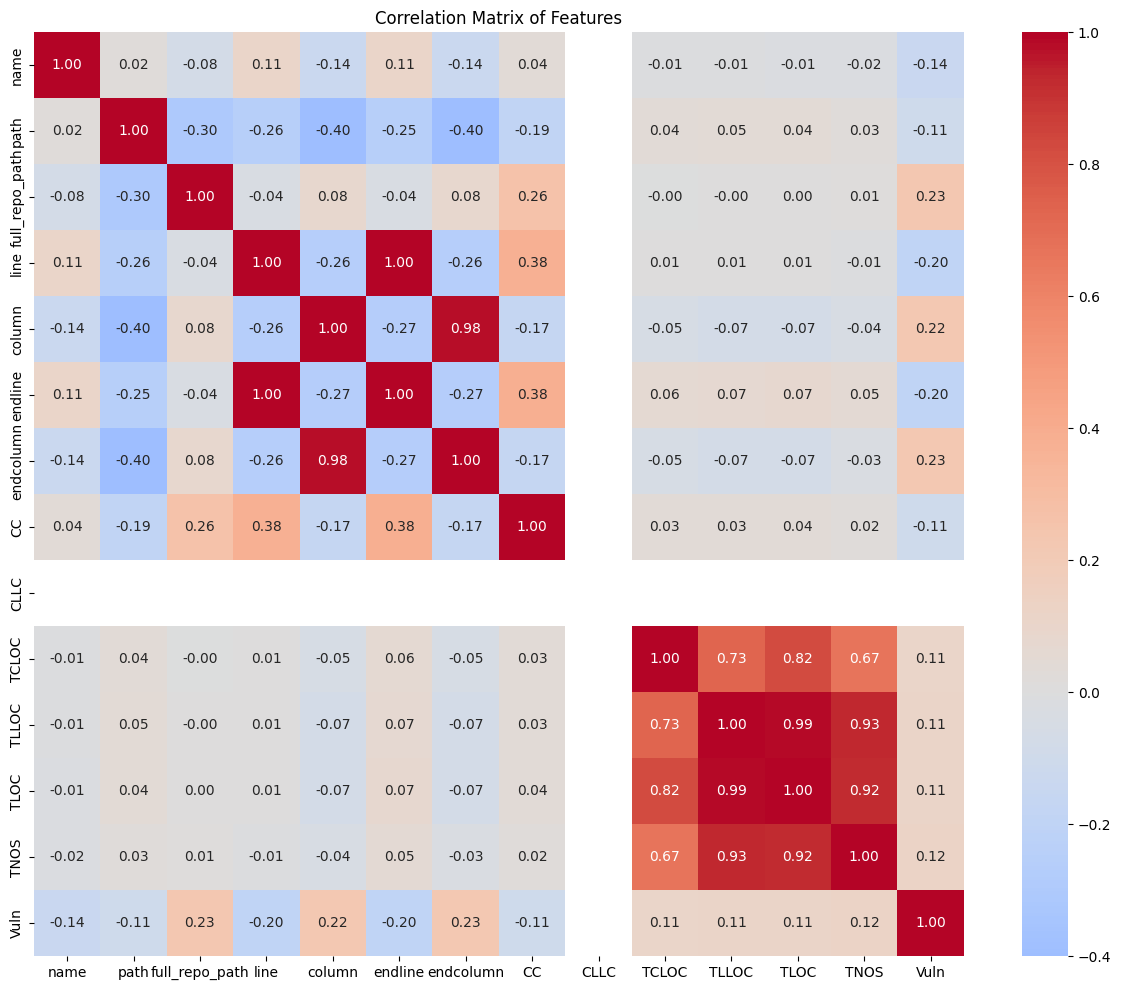

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(15, 12))

sns.heatmap(correlation_matrix, annot=True,fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
vuln_corr = correlation_matrix['Vuln'].sort_values(ascending=False)
print("Correlations with 'Vuln':\n", vuln_corr)


Correlations with 'Vuln':
 Vuln              1.000000
full_repo_path    0.230631
endcolumn         0.225345
column            0.220199
TNOS              0.123999
TLOC              0.114933
TLLOC             0.108440
TCLOC             0.107907
CC               -0.106543
path             -0.107899
name             -0.142577
endline          -0.195720
line             -0.203256
CLLC                   NaN
Name: Vuln, dtype: float64


#logistic regression

Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has a finite number of outcomes, like yes or no.

Logistic Regression - Accuracy: 0.8927835051546392
Logistic Regression - F1 Score: 0.8563409664568318
Logistic Regression - Recall: 0.8927835051546392


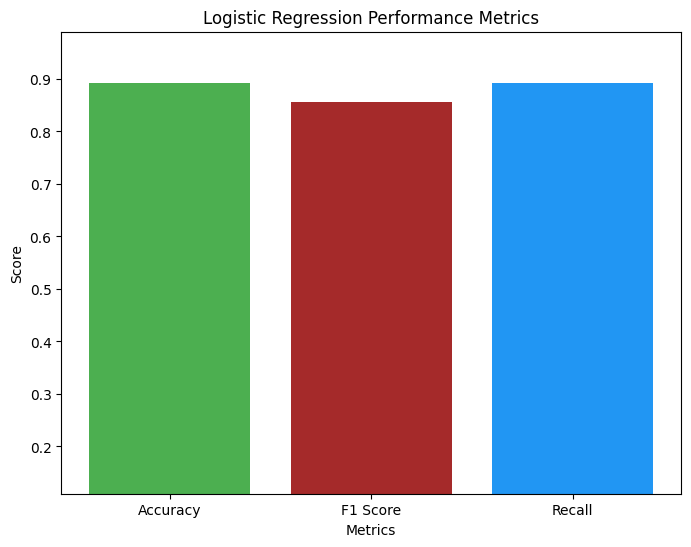

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')

print("Logistic Regression - Accuracy:", accuracy_logistic)
print("Logistic Regression - F1 Score:", f1_logistic)
print("Logistic Regression - Recall:", recall_logistic)

metrics = ['Accuracy', 'F1 Score', 'Recall']
scores = [accuracy_logistic, f1_logistic, recall_logistic]

colors = ['#4CAF50', 'brown', '#2196F3']

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=colors)
plt.title('Logistic Regression Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.11, 0.99)
plt.show()

#linear Regression

Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Linear Regression - Accuracy: 0.8812371134020619
Linear Regression - F1 Score: 0.8287188908249873
Linear Regression - Recall: 0.8812371134020619


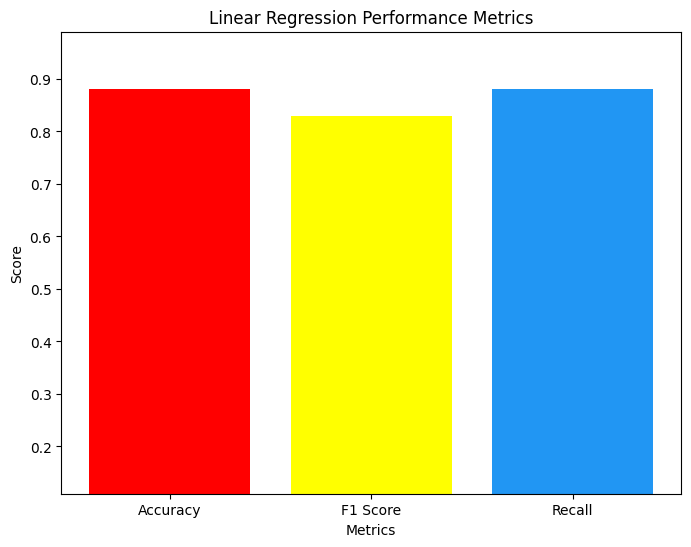

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
y_pred_linear = np.round(y_pred_linear)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear, average='weighted')
recall_linear = recall_score(y_test, y_pred_linear, average='weighted')

print("Linear Regression - Accuracy:", accuracy_linear)
print("Linear Regression - F1 Score:", f1_linear)
print("Linear Regression - Recall:", recall_linear)

metrics = ['Accuracy', 'F1 Score', 'Recall']
scores = [accuracy_linear, f1_linear, recall_linear]

colors = ['red', 'yellow', '#2196F3']
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=colors)
plt.title('Linear Regression Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.11, 0.99)  #
plt.show()


#Random Forest classifier

The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees. Random Forests are particularly well-suited for handling large and complex datasets, dealing with high-dimensional feature spaces, and providing insights into feature importance. This algorithm’s ability to maintain high predictive accuracy while minimizing overfitting makes it a popular choice across various domains, including finance, healthcare, and image analysis, among others.

Random Forest - Accuracy: 0.9645360824742268
Random Forest - F1 Score: 0.9627723894532058
Random Forest - Recall: 0.9645360824742268


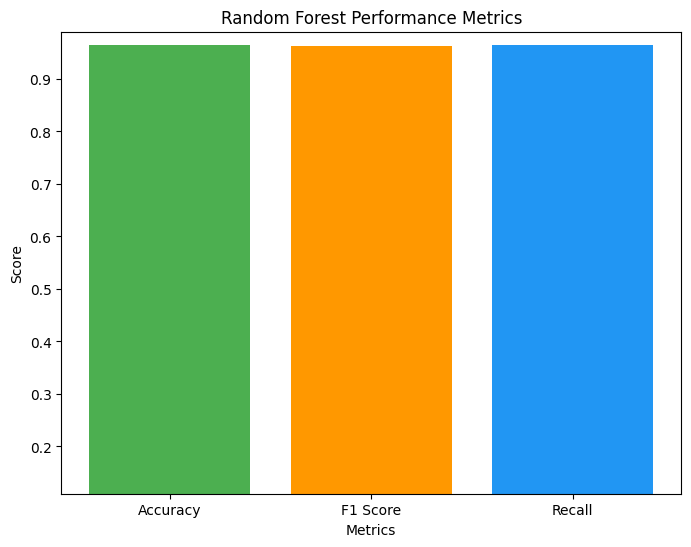

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_rf)
print("Random Forest - Recall:", recall_rf)

metrics = ['Accuracy', 'F1 Score', 'Recall']
scores = [accuracy_rf, f1_rf, recall_rf]

colors = ['#4CAF50', '#FF9800', '#2196F3']

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=colors)
plt.title('Random Forest Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.11, 0.99)
plt.show()

#K-Nearest Neighbors (KNN)



KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data). We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute.

K-Nearest Neighbors - Accuracy: 0.9191752577319587
K-Nearest Neighbors - F1 Score: 0.9169399664835223
K-Nearest Neighbors - Recall: 0.9191752577319587


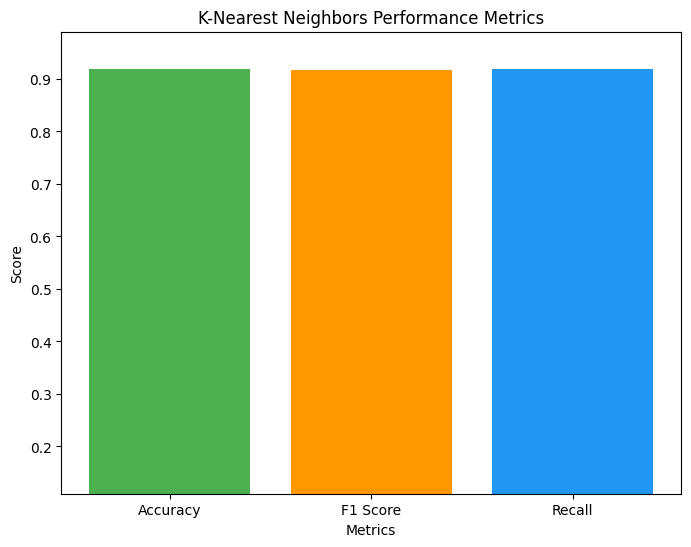

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print("K-Nearest Neighbors - Accuracy:", accuracy_knn)
print("K-Nearest Neighbors - F1 Score:", f1_knn)
print("K-Nearest Neighbors - Recall:", recall_knn)

metrics = ['Accuracy', 'F1 Score', 'Recall']
scores = [accuracy_knn, f1_knn, recall_knn]

colors = ['#4CAF50', '#FF9800', '#2196F3']

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=colors)
plt.title('K-Nearest Neighbors Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.11, 0.99)
plt.show()



#Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression tasks. While it can be applied to regression problems, SVM is best suited for classification tasks. The primary objective of the SVM algorithm is to identify the optimal hyperplane in an N-dimensional space that can effectively separate data points into different classes in the feature space. The algorithm ensures that the margin between the closest points of different classes, known as support vectors, is maximized.

Support Vector Machine - Accuracy: 0.8997938144329897
Support Vector Machine - F1 Score: 0.8952904431407518
Support Vector Machine - Recall: 0.8997938144329897


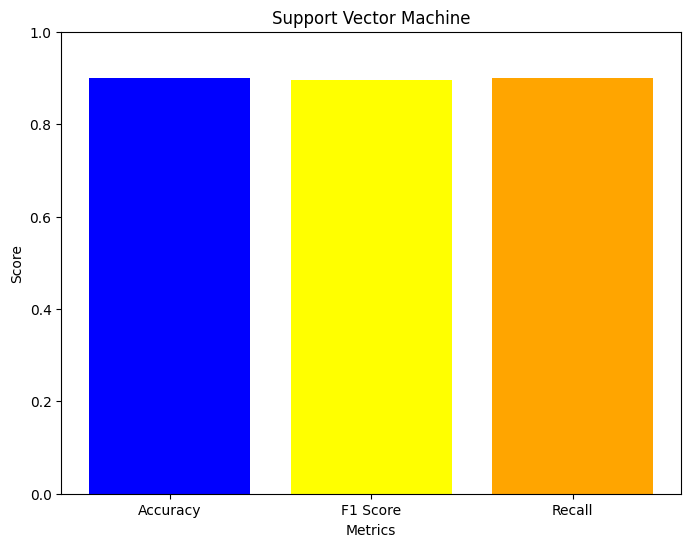

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print("Support Vector Machine - Accuracy:", accuracy_svm)
print("Support Vector Machine - F1 Score:", f1_svm)
print("Support Vector Machine - Recall:", recall_svm)

metrics = ['Accuracy', 'F1 Score', 'Recall']
scores = [accuracy_svm, f1_svm, recall_svm]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'yellow', 'orange'])
plt.title('Support Vector Machine')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


#Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. To start with, let us consider a dataset.

One of the most simple and effective classification algorithms, the Naïve Bayes classifier aids in the rapid development of machine learning models with rapid prediction capabilities.

Naive Bayes - Accuracy: 0.8474226804123711
Naive Bayes - F1 Score: 0.836418454607184


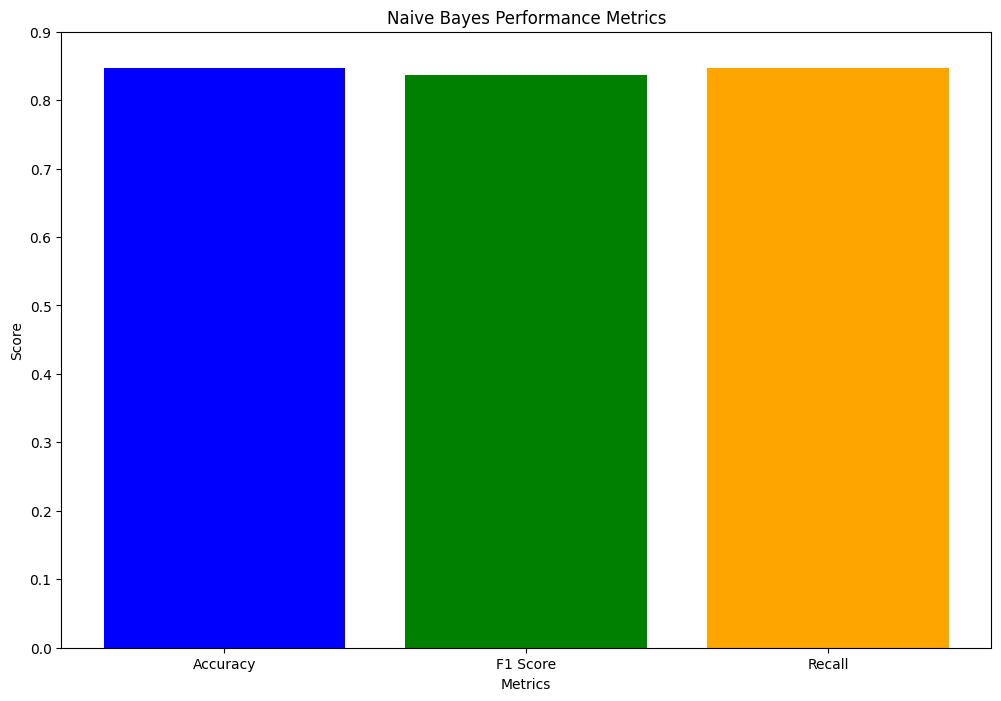

Naive Bayes - Recall: 0.8474226804123711


In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')

print("Naive Bayes - Accuracy:", accuracy_nb)
print("Naive Bayes - F1 Score:", f1_nb)

metrics = ['Accuracy', 'F1 Score', 'Recall']
scores = [accuracy_nb, f1_nb, recall_nb]

plt.figure(figsize=(12, 8))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.title('Naive Bayes Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 0.9)
print("Naive Bayes - Recall:", recall_nb)



Finall summary of all the models

In [ ]:
results = {
    'Model': ['Logistic Regression', 'Linear Regression', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [accuracy_logistic, accuracy_linear, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_nb],
    'F1 Score': [f1_logistic, f1_linear, f1_rf, f1_knn, f1_svm, f1_nb],
    'Recall': [recall_logistic, recall_linear, recall_rf, recall_knn, recall_svm, recall_nb]
}

results_df = pd.DataFrame(results)
print(results_df)


                    Model  Accuracy  F1 Score    Recall
0     Logistic Regression  0.892784  0.856341  0.892784
1       Linear Regression  0.881237  0.828719  0.881237
2           Random Forest  0.966186  0.964438  0.966186
3     K-Nearest Neighbors  0.919175  0.916940  0.919175
4  Support Vector Machine  0.899794  0.895290  0.899794
5             Naive Bayes  0.847423  0.836418  0.847423


Model Accuracies:
                    Model  Accuracy
0     Logistic Regression  0.892784
1       Linear Regression  0.881237
2           Random Forest  0.966186
3     K-Nearest Neighbors  0.919175
4  Support Vector Machine  0.899794
5             Naive Bayes  0.847423


<ipython-input-30-23490123cf9a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


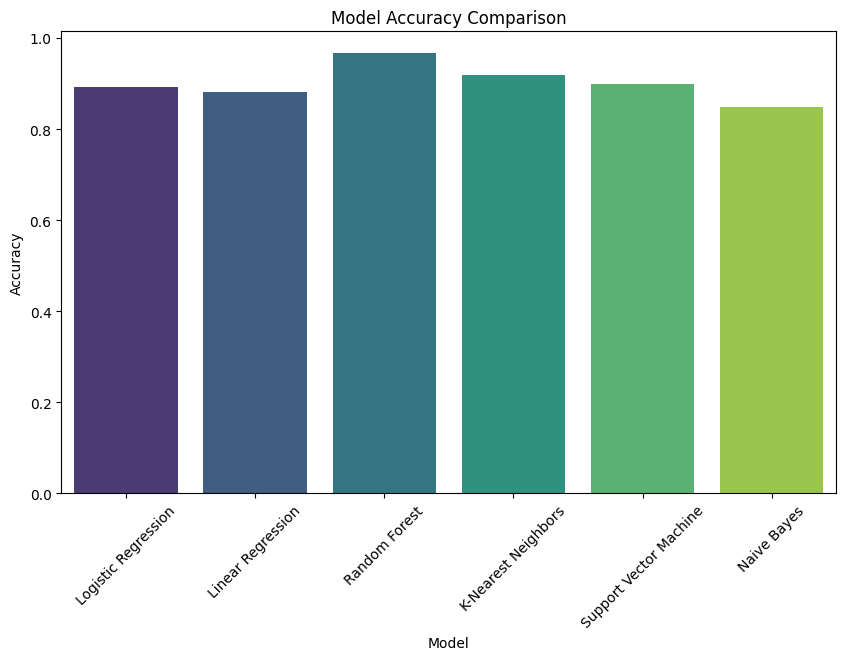

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model_accuracies = {
    "Logistic Regression": accuracy_logistic,
    "Linear Regression": accuracy_linear,
    "Random Forest": accuracy_rf,
    "K-Nearest Neighbors": accuracy_knn,
    "Support Vector Machine": accuracy_svm,
    "Naive Bayes": accuracy_nb
}

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

print("Model Accuracies:")
print(accuracy_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
